In [1]:
import dimelo as dm
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import pysam
import time
import pyBigWig
import numpy as np

In [2]:
import sys
print(sys.executable)

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/bin/python


In [3]:
# stuff for the dimelo dev testing

combined_bam_filepath = '/clusterfs/nilah/oberon/downloads/prod_CTCF_winnowmap_guppy_merge.sorted.bam'
megalodon_bam_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam'
two_color_r9 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/lmnb1-accessibility_20220214_megalodon/barcode10_rabbit-abcam/mod_mappings.10.sorted.bam'
test_r10 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/r10/Dorado_R10_calls.bam'
hp1_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP1.bam'
hp2_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP2.bam'
pacbio_bam_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/PacBio/GM12878.CENPC.cell1.winnowmap.sorted.bam'
output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/test_region/'
sql_output = 'test_output'
hp1_sample_name = 'gm12878_ctcf_hp1'
genome_path = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta'
v1_1_genome_path = '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta'
hg38_genome_path = '/clusterfs/nilah/ayesha/basenji/baselines/gm12878/data/hg38.fa'



In [4]:
#dm.qc_report(megalodon_bam_filepath,'test',output_dir)

In [15]:
start_time = time.time()
dm.parse_bam(
    megalodon_bam_filepath,
    'test',output_dir,
    basemods=('mA','CpG'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path,
    checkAgainstRef=True,
    formats_list = ['bigwig'],
    cores=1,
    memory=2000000
)
end_time = time.time()
print(end_time-start_time)

bases in batch 2007020
bases in batch 2008032
bases in batch 2018236
bases in batch 2005119
bases in batch 1324087
37.63848900794983


In [5]:
start_time = time.time()
dm.parse_bam(
    megalodon_bam_filepath,
    '10M',output_dir,
    basemods=('mA','CpG'),
    region='chr1:0-10000000',
    referenceGenome=genome_path,
    checkAgainstRef=True,
    formats_list = ['bigwig'],
    cores=1,
    memory=100000000
)
end_time = time.time()
print(end_time-start_time)

bases in batch 100027290
bases in batch 100000301
bases in batch 53582611
726.4972567558289


In [37]:
with pyBigWig.open(output_dir+'test_bigwig_mod-over-validCpG.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    mod_over_validCpG = np.array(values)
with pyBigWig.open(output_dir+'test_bigwig_modCpG.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    modCpG = np.array(values)
with pyBigWig.open(output_dir+'test_bigwig_validCpG.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    validCpG = np.array(values)
with pyBigWig.open(output_dir+'test_bigwig_mod-over-validmA.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    mod_over_validmA= np.array(values)
with pyBigWig.open(output_dir+'test_bigwig_modmA.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    modmA= np.array(values)
with pyBigWig.open(output_dir+'test_bigwig_validmA.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,0,contig_length)
    validmA= np.array(values)

mA plots and comparisons

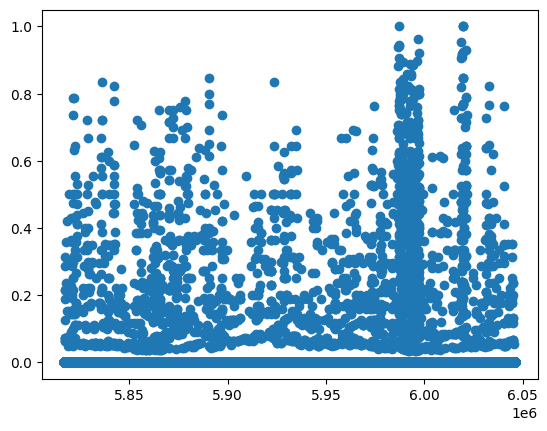

In [17]:
plt.scatter(np.arange(0,6046272),mod_over_validCpG)

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


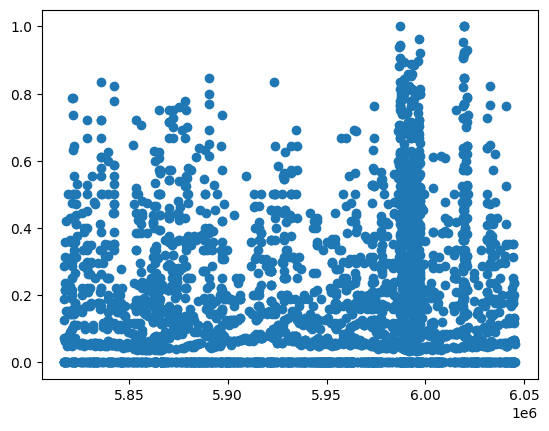

In [20]:
plt.scatter(pile_coordinates,modified_pile_dict['CpG']/(valid_pile_dict['CpG']))

In [21]:
print(valid_pile_dict['N:A+m:N'])

[ 0. 14. 17. ...  0. 17. 17.]


In [19]:
baseline_output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/baseline'
megalodon_sample_name = 'gm12878_ctcf_megalodon'
aggregated_counts = pd.read_sql("SELECT * from methylationAggregate_" + megalodon_sample_name, 
                        sqlite3.connect(baseline_output_dir + "/" + megalodon_bam_filepath.split("/")[-1]
                                        .replace(".bam", "") + ".db"))

In [20]:
a_counts = aggregated_counts[aggregated_counts['mod']=='A+Y'].sort_values(by='pos',ascending=True)

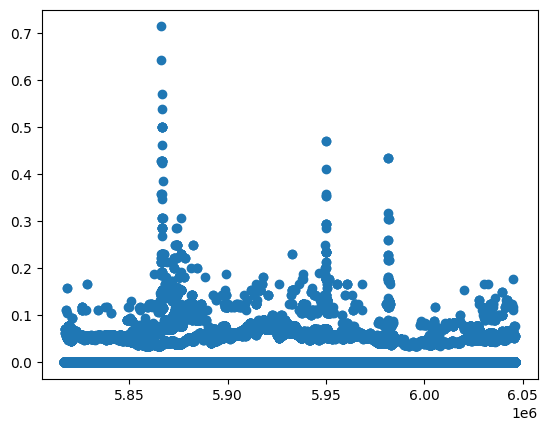

In [21]:
# plt.figure(figsize=(10,2.5))
plt.scatter(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])

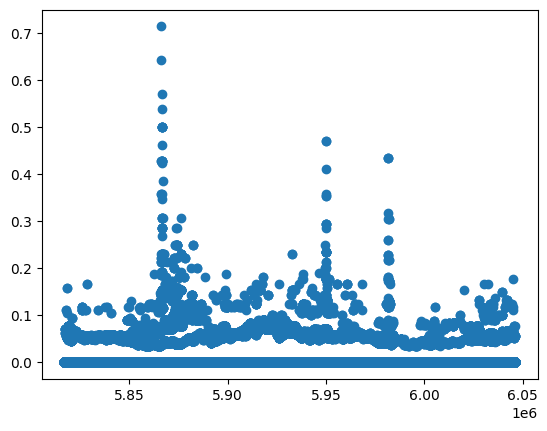

In [22]:
plt.scatter(np.arange(0,6046272),mod_over_validmA)

In [23]:
print(len(a_counts['methylated_bases']),len(modified_pile_dict['N:A+m:N']))

NameError: name 'modified_pile_dict' is not defined

In [42]:
baseline_coordinates = {x:y for x,y in zip(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])}
new_package_coordinates = {x:y for x,y in zip(np.arange(0,6046272),mod_over_validmA)}

In [43]:
diff_by_coordinates = {x:new_package_coordinates[x]-baseline_coordinates[x] for x in baseline_coordinates if x in new_package_coordinates}

Text(0, 0.5, 'delta')

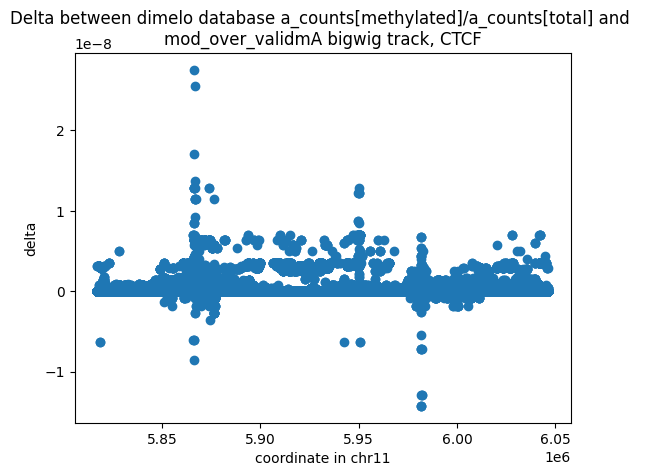

In [44]:
plt.scatter(diff_by_coordinates.keys(),diff_by_coordinates.values())
plt.title('Delta between dimelo database a_counts[methylated]/a_counts[total] and \nmod_over_validmA bigwig track, CTCF')
plt.xlabel('coordinate in chr11')
plt.ylabel('delta')

In [18]:
print(len(diff_by_coordinates))

143442


/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


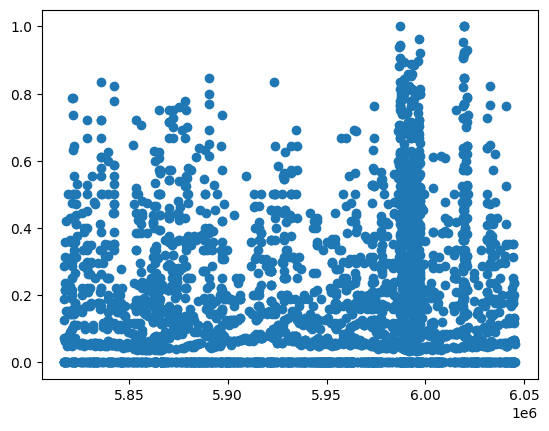

In [25]:
plt.scatter(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))

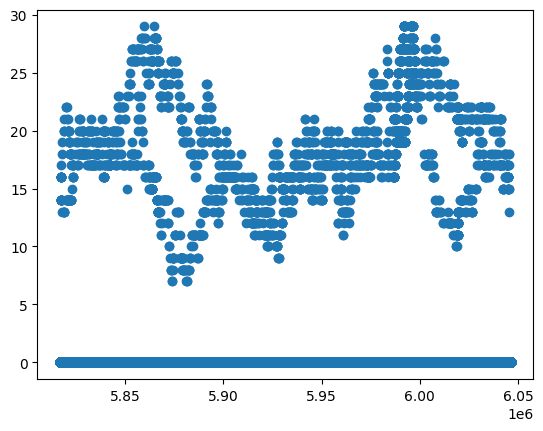

In [26]:
plt.scatter(pile_coordinates,valid_pile_dict['N:C+m:G'])

In [31]:
c_counts = aggregated_counts[aggregated_counts['mod']=='C+Z'].sort_values(by='pos',ascending=True)

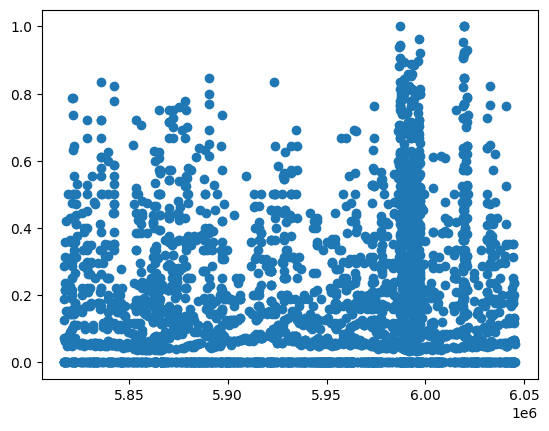

In [32]:
plt.scatter(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])

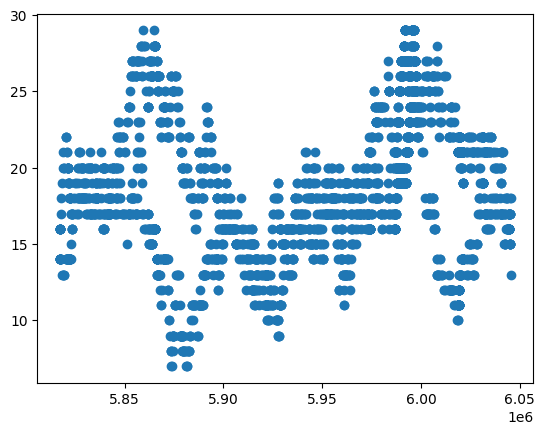

In [33]:
plt.scatter(c_counts['pos'],c_counts['total_bases'])

In [34]:
c_baseline_coordinates = {x:y for x,y in zip(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])}
c_new_package_coordinates = {x:y for x,y in zip(np.arange(0,6046272),mod_over_validCpG)}

In [35]:
c_diff_by_coordinates = {x:c_new_package_coordinates[x]-c_baseline_coordinates[x] 
                       for x in c_baseline_coordinates if x in c_new_package_coordinates}

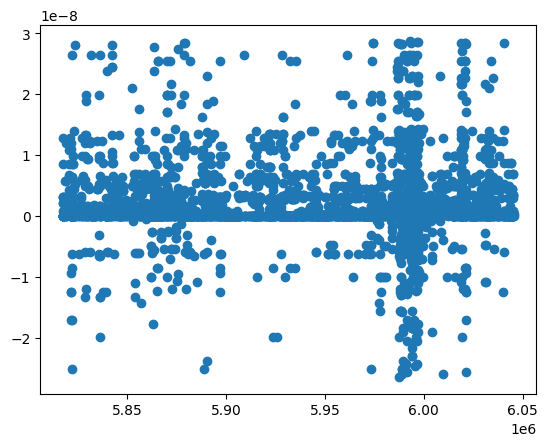

In [36]:
plt.scatter(c_diff_by_coordinates.keys(),c_diff_by_coordinates.values())

In [8]:
=start_time = time.time()
(hp1_pile_coordinates,hp1_valid_pile_dict,hp1_modified_pile_dict) = dm.parse_bam(
    hp1_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path)
end_time = time.time()
print(end_time-start_time)

chr11 5816896 6046272
5816896 6046271
read pos 5835500
9.660791873931885
